# Selection On a Single Locus with Two Alleles

In this assignment we are looking at the change in allele frequency at a single site over 200 generations due to selection in an infinitely large population with dominance and heredity affecting the outcome. We restrict the number of alleles at our locus to two, represented by $p$ and $(1-p)$. With two alleles there are three possible genotypes. The frequencies are $p^{2}$, $2p(1-p)$, and $(1-p)^{2}$. Since selection is occuring in our system, each genotype has a fitness value associated with it. We define the fitness values as $W_{11}$, $W_{12}$ and $W_{22}$, with the subscripts $1$ and $2$ representing the alleles $p$ and $(1-p)$, respectfully. 

We can multiply the frequency of each genotype by its fitness value, which can be interpreted as the sum of the genotypic frequencies weighted by their genotypes, giving us the mean fitness of the population:

$$\overline{W} = p^{2}W_{11}+2p(1-p)W_{12}+(1-p)^{2}W_{22}$$

By dividing the expected frequency of allele $p$ by the mean fitness of all genotypes, we get the expected frequency of $p$ in the next generation. 

$$p_{t+1} = \frac{p^{2}W_{11} + p(1-p)W_{12}}{\overline{W}}$$

Using the recurrence equation above, we are able to write a simple for-loop using Python to examine the effect of selection on the frequency of $p$ over 200 generations. We set the initial frequency of $p$ to 0.01, say that $W_{11} = W_{12} = 1$, and that $W_{22} = 0.9$

We now would like to examine the effects that genetic addititivity and dominance have on the change in frequency of the allele $p$.

We start by looking at how we can partition variance given a phenotype into the variance explained by genetics, the environment, and the interaction between genetics and the environment. 

$$V_{P}=V_{G}+V_{E}+V_{G*E}$$

The term $V_{G}$ can be partitioned into additive, dominant, and epistatic variance as follows:

$$V_{G}=V_{A}+V_{D}+V_{I}$$

From here we get narrow sense heritability, $h^{2}=\frac{V_{A}}{V_{P}}$, and broad-sense heritability, $h^{2}=\frac{V_{G}}{V_{P}}$.

To model the effect of dominance on fitness of different genotypes, we can assign homozygotes either a positive or negative value, represented by $a$ for allele 1 and $-a$ for allele 2, and heterozygotes the value $d$, indicating dominance. From here we want to calculate the expected deviation from the mean phenotype for a given allele, known as the average effect of an allele. For allele 1 the average effect is $\alpha _{1}=p*a+(1-p)*d-\bar{z}$ and for allele 2 the average effect is $\alpha _{2}=(1-p)*(-a)+p*d-\bar{z}$, with $\bar{z} = p^{2}a+2p(1-p)d+(1-p)^{2}(-a)$.


| Fitness  | Phenotype | Breeding Value | Frequency |
|:--------:|:---------:|:--------------:|:---------:|
| $W_{11}$ |  $a$      | $2\alpha _{1}$ | $p^{2}$          |
| $W_{12}$ |  $d$      | $\alpha _{1}+\alpha _{2}$  |   $2p(1-p)$        |
| $W_{22}$ |     $-a$  | $2\alpha _{2}$ | $(1-p)^{2}$           |

After some algebra it can be shown that the dominance variance is equal to

$V_{D}=(2p(1-p)d)^{2}$

and that the additive variance is equal to 

$V_{A}=2p(1-p)[a+d((1-p)-p)]^2$

But what we want to see is how heritability, $h_{2}$, changes over time. Looking back at our equation for heritability, $h^{2}=\frac{V_{A}}{V_{P}}$, we see that we now have the additive variance, but we need the phenotypic variance. Assuming no environmental variance, we can get the phenotypic variance by summing the additive and dominant variance, thus:

$$V_{P} = V_{A} + V_{D}$$

so 

$$h_{2} = \frac{V_{A}}{(V_{A} + V_{D})}$$



There is no epistatic variation because we are looking at a single locus.




In [24]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def SelectOneLocus(p, s, h, a, d, gens):
    pFreq = []
    V_A = []
    V_D = []
    h2 = []
    W11 = 1
    W12 = 1 - h*s
    W22 = 1 - s
    for x in range(0,gens):
        if x == 0:
            pFreq.insert(x, p)
            V_A_0 = (2*p*(1-p))*((a+(d*((1-p)-p)))**2)
            V_A.insert(x, V_A_0)
            V_D_0 = (2*d*p*(1-p))**2
            V_D.insert(x, V_D_0)
            #z_bar = (p**2)*a + (2*p*(1-p)*d) + ((1-p)**2)*-a
            #alpha1 = p*a + (1-p)*d - z_bar
            #alpha2 = (1-p) * (-a) + p * d - z_bar
            #h2_new = V_A_0 / ((p**2)*2*(alpha1**2)) + (2*p*(1-p)*((alpha1 + alpha2)**2)) + (((1-p)**2)*1*(alpha2**2))
            h2_new = V_A_0 / (V_D_0 + V_A_0)
            h2.insert(x, h2_new)
            #print type(V_A_0), type(z_bar), type(alpha1), type(alpha2)
        else:
            p_next = pFreq[x-1]
            W_mean = ((p_next**2)*W11) + (2*(1-p_next)*p_next*W12) + (((1-p_next)**2)* W22)
            pNew = (p_next*((p_next*W11) + ((1-p_next)*W12))) / W_mean
            pFreq.insert(x, pNew)
            V_A_0 = (2*p_next*(1-p_next))*((a+(d*((1-p_next)-p_next)))**2)
            V_D_0 = (2*d*p_next*(1-p_next))**2
            V_A.insert(x, V_A_0)
            V_D.insert(x, V_D_0)
            #z_bar = (p_next**2)*a + (2*p_next*(1-p_next)*d) + ((1-p_next)**2)*-a
            #alpha1 = (p_next*a) + ((1-p_next)*d) - z_bar
            #alpha2 = ((1-p_next) * (-a)) + (p_next * d) - z_bar
            #h2_new = V_A_0 / ( ((p_next**2)*2*(alpha1**2)) + (2*p_next*(1-p_next)*((alpha1 + alpha2)**2)) + (((1-p_next)**2)*2*(alpha2**2)))
            h2_new = V_A_0 / (V_D_0 + V_A_0)
            h2.insert(x, h2_new)
    plt.plot(pFreq, 'r-', label=r'$p$')
    plt.plot(V_A, 'b-',label=r'$V_{A}$')
    plt.plot(V_D, 'g-',label=r'$V_{D}$')
    plt.plot(h2, 'k-',label=r'$h_{2}$')
    plt.xlabel('t, generations')
    plt.ylabel('p')
    plt.legend()
    plt.show()
    return plt

Now let's plot the situation where the dominant allele is favored over $300$ generations with values of $p = 0.01$, $s = 0.2$, $h = 0$ $a = 1$, and $d=1$.

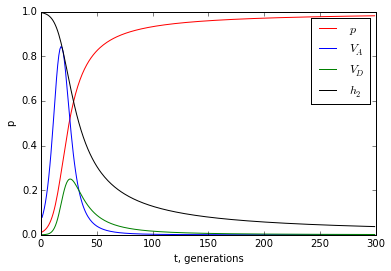

<module 'matplotlib.pyplot' from '/Users/WRShoemaker/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [51]:
SelectOneLocus(0.01, 0.2, 0, 1, 1, 300)

Next let's examine codominance with $p = 0.01$, $h = 0.5$, $s = 0.1$, $a=1$, and $d=0$ run for $300$ genrations. Lines that are too close to the limit of an axis do not show up in matplotlib.

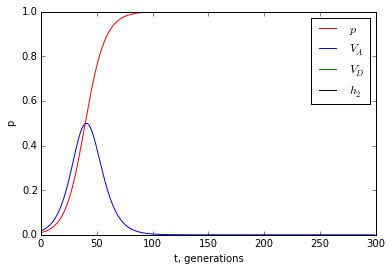

<module 'matplotlib.pyplot' from '/Users/WRShoemaker/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [52]:
SelectOneLocus(0.01, 0.2, 0.5, 1, 0, 300)

Last, we'll examine the situation where the recessive allele is favored with $p = 0.01$, $h = 1.0$ and $s = 0.1$ run for $1,00$ genrations.

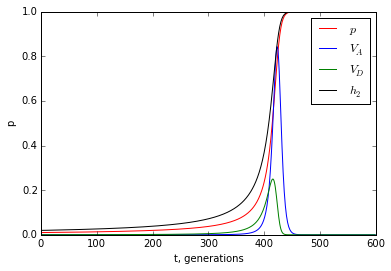

<module 'matplotlib.pyplot' from '/Users/WRShoemaker/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [53]:
SelectOneLocus(0.01, 0.2, 1, 1, -1, 600)